Implement the intensity transformation

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

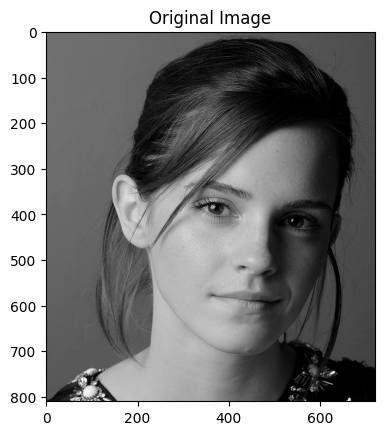

In [53]:
# Read the image
image = cv2.imread('a1images/emma.jpg', 0) 
assert image is not None    # Check if the image exists

#plot the orginal image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


(256,)


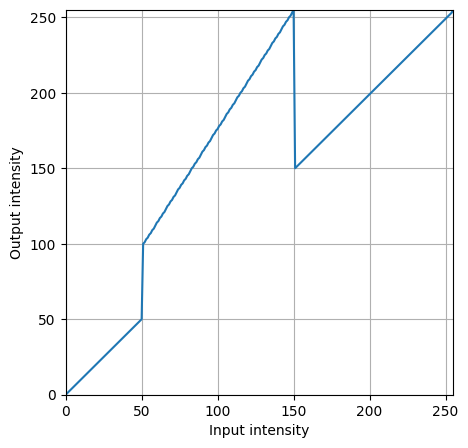

In [5]:
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate the arrays
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

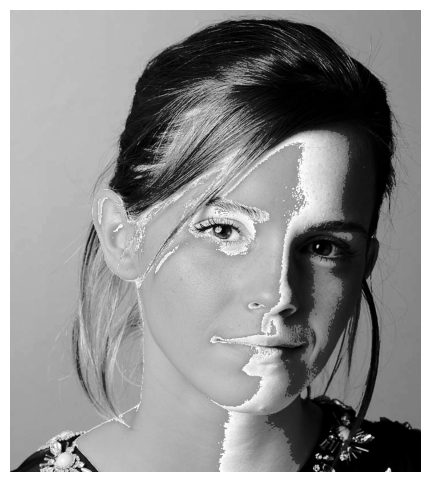

In [7]:
# Apply the transformation
f = t[image]

# plot the image
plt.figure(figsize=(6, 6))
plt.imshow(f, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Question 2

In [32]:
# Read the image in grayscale
brain_image = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
assert brain_image is not None

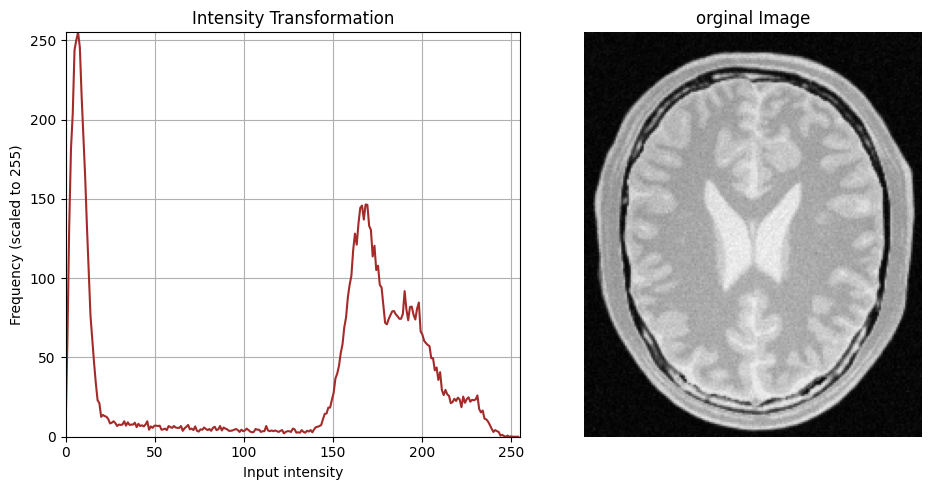

In [40]:
histogram, bin_edges = np.histogram(brain_image, bins=256, range=(0, 255))

# Normalize the histogram if you want the values between 0 and 255 (optional)
histogram = histogram / histogram.max() * 255

fig, ax = plt.subplots(1, 2, figsize=(10, 5)) 

# Plot the intensity transformation curve on the first subplot
ax[0].plot(bin_edges[0:-1], histogram, color='brown')  # bin_edges gives the intensity values, histogram gives frequency
ax[0].set_xlabel("Input intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_ylabel("Frequency (scaled to 255)")
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

# Display the transformed image on the second subplot
ax[1].imshow(brain_image, cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')  # Hide axes for the image
ax[1].set_title("orginal Image")

# Show both plots side by side
plt.tight_layout()  # Adjusts spacing between the plots
plt.show()

In [38]:
mu = 255
sigma = 25
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)



(256,)


white

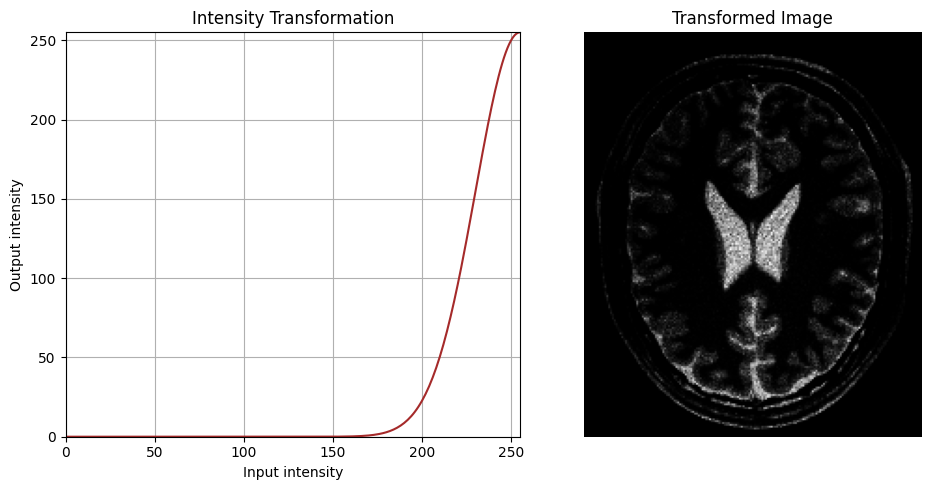

In [37]:
# Create a figure with 1 row and 2 columns for side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, 10x5 inch figure

# Plot the intensity transformation curve on the first subplot
ax[0].plot(t, color='brown')
ax[0].set_xlabel("Input intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_ylabel("Output intensity")
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

# Display the transformed image on the second subplot
ax[1].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')  # Hide axes for the image
ax[1].set_title("Transformed Image")

# Show both plots side by side
plt.tight_layout()  # Adjusts spacing between the plots
plt.show()


gray


(256,)


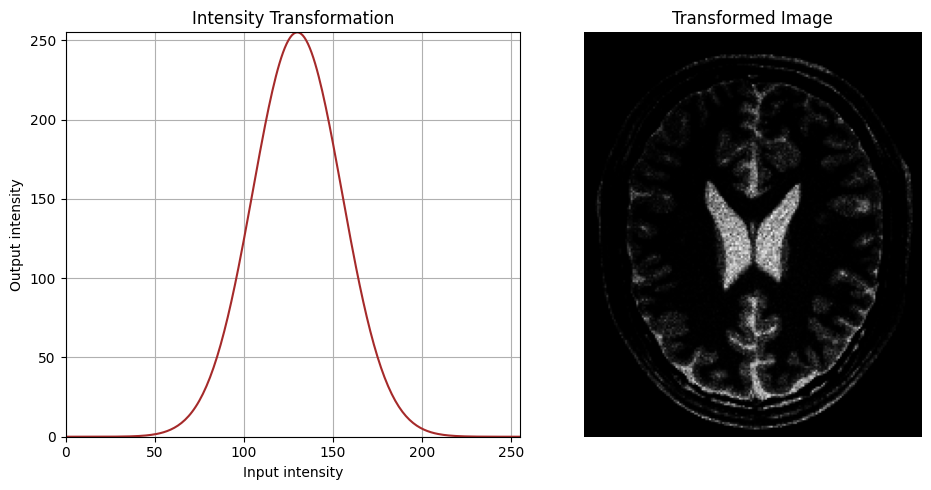

In [41]:
mu = 130
sigma = 25
x = np.linspace(0, 255, 256)
t = 255 * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Ensure the output is in the valid range for image intensities [0, 255]
t = np.clip(t, 0, 255)

print(t.shape)

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, 10x5 inch figure

# Plot the intensity transformation curve on the first subplot
ax[0].plot(t, color='brown')
ax[0].set_xlabel("Input intensity")
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_ylabel("Output intensity")
ax[0].grid(True)
ax[0].set_title("Intensity Transformation")

# Display the transformed image on the second subplot
ax[1].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')  # Hide axes for the image
ax[1].set_title("Transformed Image")

# Show both plots side by side
plt.tight_layout()  # Adjusts spacing between the plots
plt.show()




Question 3

In [128]:
# Read the image in grayscale
shadows_image = cv2.imread("a1images/highlights_and_shadows.jpg")
assert shadows_image is not None

shadow_image = cv2.cvtColor(shadows_image, cv2.COLOR_BGR2LAB)

In [139]:
L,a,b = cv2.split(shadow_image)

gamma = 0.6
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
new_shadow_image = cv2.LUT(L, t)

merge_image = cv2.merge([new_shadow_image, a, b])
after_new_shadow_image= cv2.cvtColor(merge_image, cv2.COLOR_LAB2RGB)

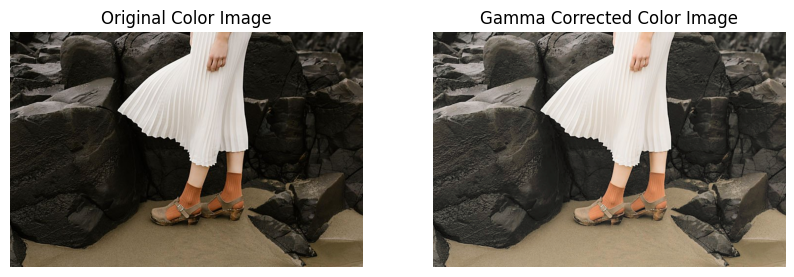

In [140]:
# Display the original and corrected images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(shadows_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

# Gamma corrected image
plt.subplot(1, 2, 2)
plt.imshow(after_new_shadow_image)
plt.title('Gamma Corrected Color Image')
plt.axis('off')

# Show both images
plt.show()

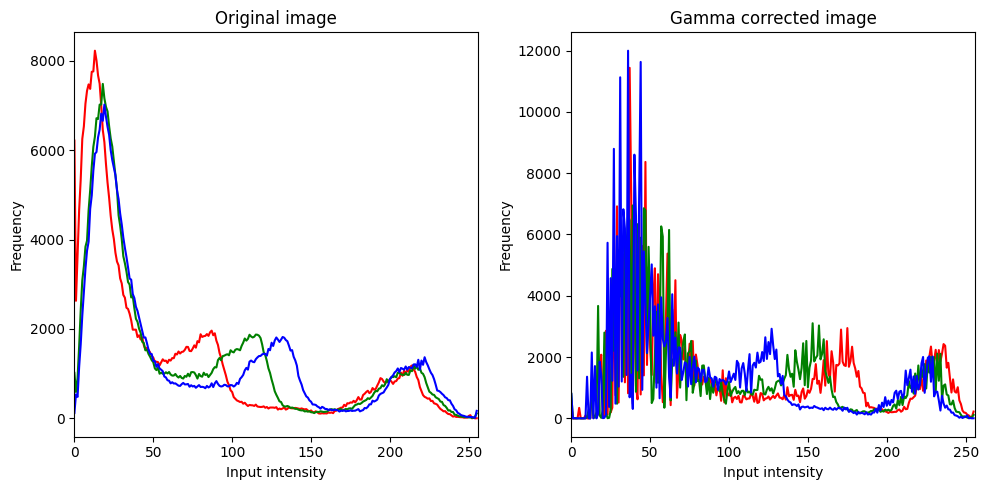

In [146]:
# Plot the histograms of the original and gamma corrected images

color = ('r', 'g', 'b')  

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
for i, col in enumerate(color):
    hist1 = cv2.calcHist([shadows_image], [i], None, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Original image')
plt.xlabel('Input intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])


plt.subplot(1, 2, 2)
for i, col in enumerate(color):
    hist2 = cv2.calcHist([after_new_shadow_image], [i], None, [256], [0, 256])
    plt.plot(hist2, color=col)
plt.title('Gamma corrected image')
plt.xlabel('Input intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Show both histograms
plt.tight_layout()
plt.show()

Question 4

In [ ]:
f = min(255, x+a*128*np.exp(-(x-128)**2/2**sigma**2))
